In [13]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os

In [14]:
file1 = os.path.join('clinical_trial_data.csv')
file2 = os.path.join('mouse_drug_data.csv')

trial_data = pd.read_csv(file1)
mouse_data = pd.read_csv(file2)

merged_df = trial_data.merge(mouse_data, on = 'Mouse ID')

In [15]:
# Mouse ID g989 is listed with two different drugs but all other records are exact duplicates
# all of those records were excluded, this makes no difference as the Mouse excluded was not liste
# as one of the four drugs in this analysis

merged_df = merged_df[merged_df['Mouse ID'] != 'g989']

#keep only the drugs we want to examine
merged_df = merged_df[(merged_df["Drug"] == 'Capomulin') |
                      (merged_df["Drug"] == 'Infubinol') |
                      (merged_df["Drug"] == 'Ketapril') |
                      (merged_df["Drug"] == 'Placebo')
                     ]

In [16]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [17]:
#group by treatment for change in average tumor size calculations
avg_volume = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
volume_sem = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])

In [18]:
#reshaping of avg tumor volume data
avg_volume = avg_volume.unstack(level = 0)
avg_volume.columns = avg_volume.columns.get_level_values(1)
avg_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [19]:
#reshaping of avg tumor volume data - std error
volume_sem = volume_sem.unstack(level=0)
volume_sem.columns = volume_sem.columns.get_level_values(1)
volume_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


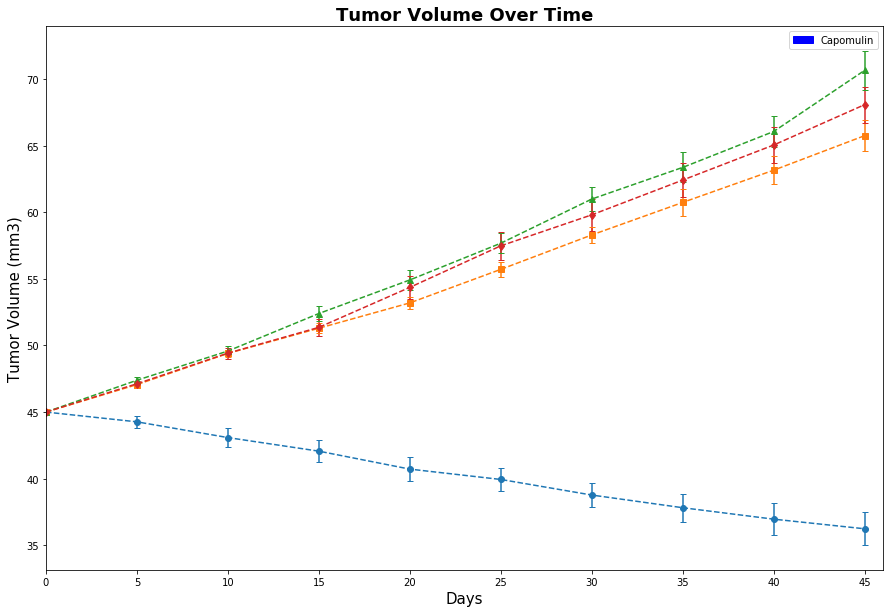

In [22]:
#plot options
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, avg_volume.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, avg_volume.index.max() + 1) 

#markers used throughout 
markers = ['o', 's', '^', 'd']

# independent variable
xvals = avg_volume.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for c in avg_volume.columns:
    plt.errorbar(xvals, 
                 avg_volume[c], 
                 volume_sem[c], #std error
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1

#legend options
red_patch = mpatches.Patch(color='red', label='Placebo')
plt.legend(handles=[red_patch])
b_patch = mpatches.Patch(color='green', label='Ketabril')
plt.legend(handles=[b_patch])
o_patch = mpatches.Patch(color='orange', label='Infubinol')
plt.legend(handles=[o_patch])
b_patch = mpatches.Patch(color='blue', label='Capomulin')
plt.legend(handles=[b_patch])

plt.show()

In [13]:
#group by treatment for metastatic site counts and std error
avg_num_spread = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
avg_spread_err = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

In [14]:
#reshaping of metastatic site data
avg_num_spread = avg_num_spread.unstack(level = 0)
avg_num_spread.columns = avg_num_spread.columns.get_level_values(level = 1)
avg_num_spread

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [15]:
#reshaping of metastatic data - std error
avg_spread_err = avg_spread_err.unstack(level = 0)
avg_spread_err.columns = avg_spread_err.columns.get_level_values(level = 1)
avg_spread_err

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


No handles with labels found to put in legend.


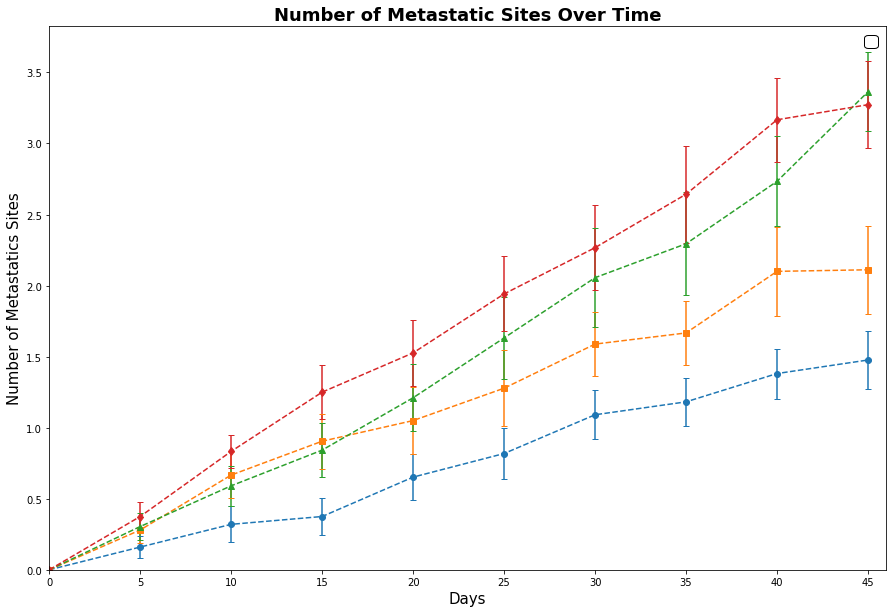

In [16]:
#Plot options

plt.figure(figsize = (15,10))
plt.title('Number of Metastatic Sites Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Number of Metastatics Sites', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0,avg_num_spread.index.max() + 3 ,5))
plt.xlim(0, avg_num_spread.index.max()+1)
plt.ylim(0, avg_num_spread.max().max() + avg_spread_err.max().max() + .1)


#creates plot for each treatment, using different markers for each

count = 0 
xvals = avg_num_spread.index #timepoints

for c in avg_num_spread:
    plt.errorbar(xvals, 
                 avg_num_spread[c], 
                 avg_spread_err[c], 
                 linestyle = '--', 
                 marker =  markers[count], #markers defined above
                 capthick = 1, 
                 capsize = 3)
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()

In [17]:
#gets dataframe of data counts at each time point per drug
#this corresponds to how many mice are still in study and therefore, alive
mice_count = merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
mice_count = mice_count.unstack(level = 0)
mice_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


No handles with labels found to put in legend.


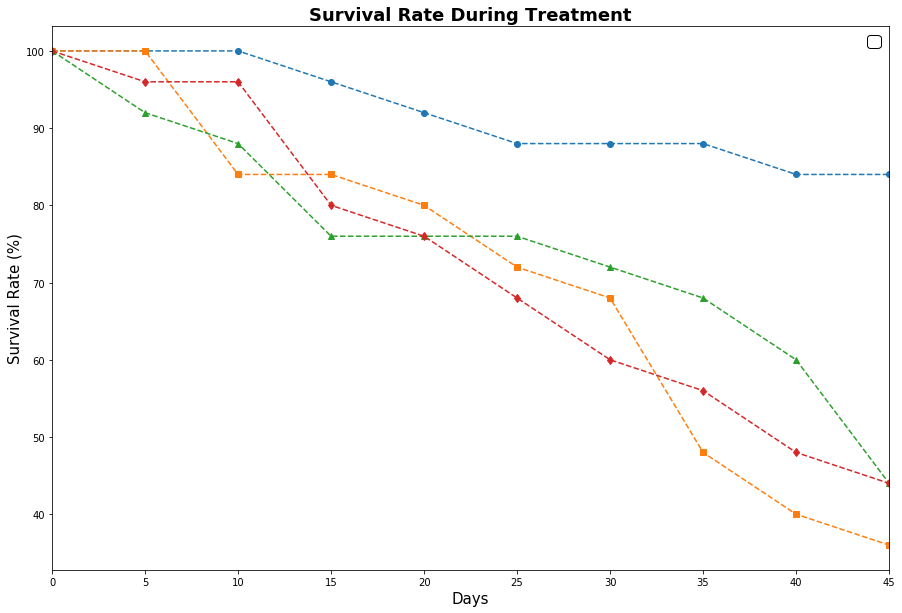

In [18]:
#plot options
plt.figure(figsize = (15,10))
plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, mice_count.index.max())


xvals = mice_count.index #timepoints

count = 0 

for c in mice_count:
    yvals = mice_count[c]/mice_count.loc[0,c] * 100 #calculates survival rate for each timepoint
    plt.plot(xvals, 
             yvals, 
             linestyle = '--', 
             marker =  markers[count], #markers list from above
             )
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()

In [19]:

#calculates tumor change for each drug
tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

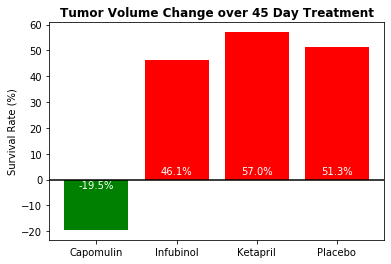

In [20]:
#plot options
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
xlabels = tumor_change.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels)

#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        tumor_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
plt.show()